<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


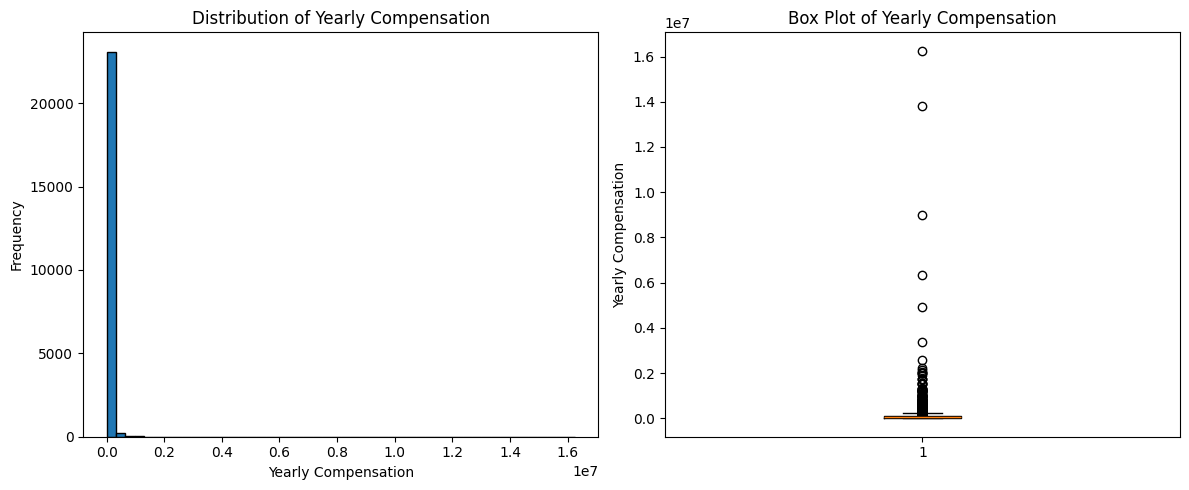

In [3]:
# Plot histogram and box plot for ConvertedCompYearly
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['ConvertedCompYearly'].dropna(), bins=50, edgecolor='black')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Yearly Compensation')

plt.subplot(1, 2, 2)
plt.boxplot(df['ConvertedCompYearly'].dropna())
plt.ylabel('Yearly Compensation')
plt.title('Box Plot of Yearly Compensation')

plt.tight_layout()
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
# Filter data for full-time employees
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Calculate median compensation
median_compensation = full_time_df['ConvertedCompYearly'].median()
print(f"Median compensation for full-time employees: {median_compensation}")


Median compensation for full-time employees: 69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



                                min        max     median          mean
Country                                                                
Gabon                     2000000.0  2000000.0  2000000.0  2.000000e+06
United States of America        1.0  1900000.0   143000.0  1.610723e+05
Antigua and Barbuda        126120.0   126120.0   126120.0  1.261200e+05
Andorra                     53703.0   193331.0   123517.0  1.235170e+05
Israel                         45.0  1295242.0   113334.0  1.199820e+05
Switzerland                   117.0   445668.0   111417.0  1.185547e+05
Singapore                    6135.0   443493.0   103482.0  1.361505e+05
Luxembourg                  51555.0   214812.0    96288.0  1.004711e+05
Australia                      96.0  2048046.0    95465.5  1.063751e+05
Ireland                       118.0   268515.0    91295.0  9.682346e+04


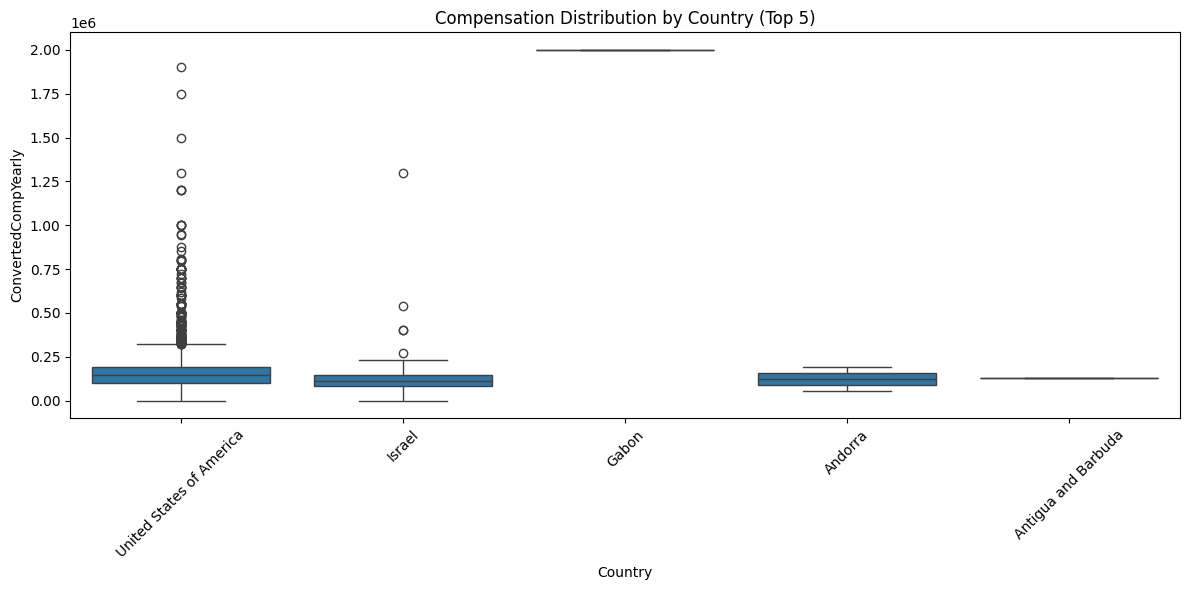

In [5]:
# Group by country and analyze compensation distribution
country_stats = df.groupby('Country')['ConvertedCompYearly'].agg(['min', 'max', 'median', 'mean']).sort_values('median', ascending=False)
print(country_stats.head(10))

# Box plot comparing compensation across top countries
top_countries = df.groupby('Country')['ConvertedCompYearly'].median().nlargest(5).index
df_top_countries = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_countries, x='Country', y='ConvertedCompYearly')
plt.xticks(rotation=45)
plt.title('Compensation Distribution by Country (Top 5)')
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [6]:
# Calculate Q1, Q3, and IQR for ConvertedCompYearly
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

print(f"Original dataset size: {len(df)}")
print(f"Dataset size after removing outliers: {len(df_no_outliers)}")
print(f"Number of outliers removed: {len(df) - len(df_no_outliers)}")


Original dataset size: 65437
Dataset size after removing outliers: 22457
Number of outliers removed: 42980


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.408438       -0.058170
WorkExp                         0.408438  1.000000       -0.032388
JobSatPoints_1                 -0.058170 -0.032388        1.000000


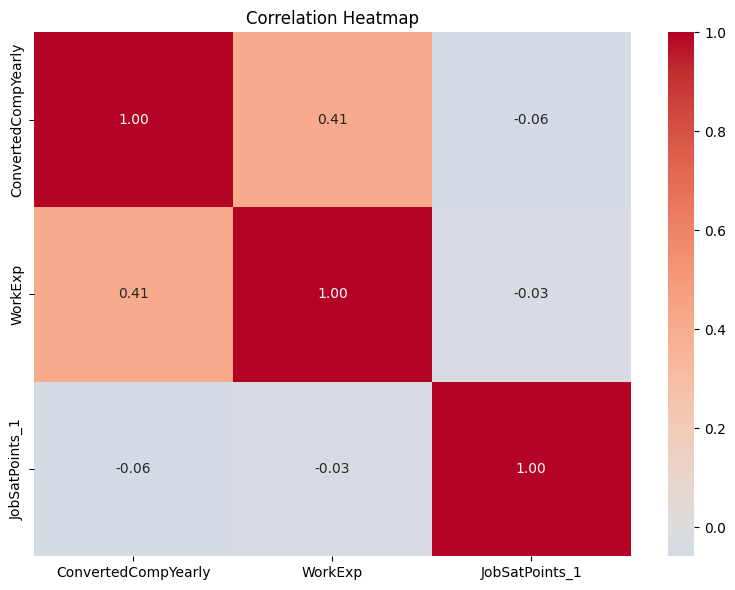

In [7]:
# Calculate correlations between key variables
correlation_vars = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
correlation_matrix = df_no_outliers[correlation_vars].corr()

# Display correlation matrix
print(correlation_matrix)

# Visualize with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


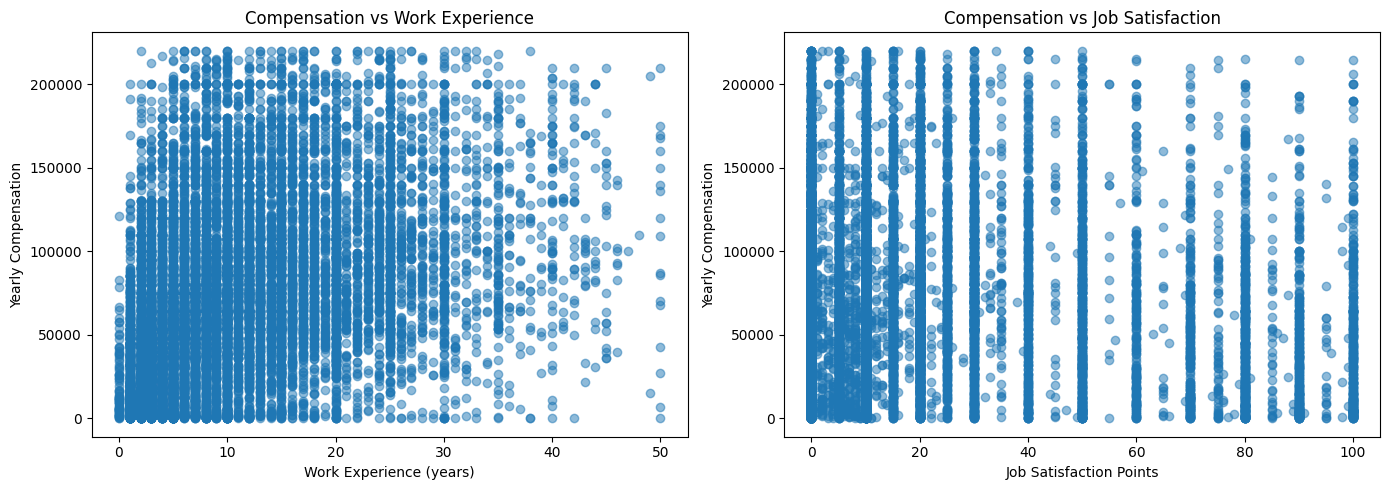

In [8]:
# Create scatter plots for specific correlations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: ConvertedCompYearly vs WorkExp
axes[0].scatter(df_no_outliers['WorkExp'], df_no_outliers['ConvertedCompYearly'], alpha=0.5)
axes[0].set_xlabel('Work Experience (years)')
axes[0].set_ylabel('Yearly Compensation')
axes[0].set_title('Compensation vs Work Experience')

# Scatter plot: ConvertedCompYearly vs JobSatPoints_1
axes[1].scatter(df_no_outliers['JobSatPoints_1'], df_no_outliers['ConvertedCompYearly'], alpha=0.5)
axes[1].set_xlabel('Job Satisfaction Points')
axes[1].set_ylabel('Yearly Compensation')
axes[1].set_title('Compensation vs Job Satisfaction')

plt.tight_layout()
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
